# **Hoax Detection Model Development**

In [1017]:
import re
import numpy as np
import math

# **Basic Machine Learning Workflow**


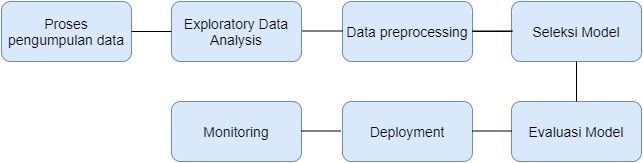

### Hoax News Detection Workflow
1. Data Collection
  *   Mengumpulkan beberapa berita non-hoax kedalam Datasets
2. Exploratory Data Analysis
3. Pre-processing
  *   Membelah isi berita menjadi beberapa kalimat berdasarkan banyaknya kalimat pada suatu berita
  *   Menghilangkan Special Character pada setiap kalimat
  *   Menghilangkan kata duplicate dan Stopword
  *   Implemetasi TF-IDF
  *   Implementasi Cosine Similarity
4. Model Selection
  *   Model yang digunakan adalah ANN
  *   Hyperparameter Tuning terhadap model ANN
  *   Seleksi Optimal Hyperparameter
5. Model Evaluation
  *   Model performance testing

In [1018]:
datasets = '''Researchers have used the technology behind the artificial intelligence (AI) chatbot ChatGPT to create a fake clinical-trial data set to support an unverified scientific claim. In a paper published in JAMA Ophthalmology on 9 November 2021, the authors used GPT-4 — the latest version of the large language model on which ChatGPT runs — paired with Advanced Data Analysis (ADA), a model that incorporates the programming language Python and can perform statistical analysis and create data visualizations. The AI-generated data compared the outcomes of two surgical procedures and indicated — wrongly — that one treatment is better than the other.


Scientific sleuths spot dishonest ChatGPT use in papers

“Our aim was to highlight that, in a few minutes, you can create a data set that is not supported by real original data, and it is also opposite or in the other direction compared to the evidence that are available,” says study co-author Giuseppe Giannaccare, an eye surgeon at the University of Cagliari in Italy.

The ability of AI to fabricate convincing data adds to concern among researchers and journal editors about research integrity. “It was one thing that generative AI could be used to generate texts that would not be detectable using plagiarism software, but the capacity to create fake but realistic data sets is a next level of worry,” says Elisabeth Bik, a microbiologist and independent research-integrity consultant in San Francisco, California. “It will make it very easy for any researcher or group of researchers to create fake measurements on non-existent patients, fake answers to questionnaires or to generate a large data set on animal experiments.”

The authors describe the results as a “seemingly authentic database”. But when examined by specialists, the data failed authenticity checks, and contained telltale signs of having been fabricated.

Surgery comparison
The authors asked GPT-4 ADA to create a data set concerning people with an eye condition called keratoconus, which causes thinning of the cornea and can lead to impaired focus and poor vision. For 15–20% of people with the disease, treatment involves a corneal transplant, performed using one of two procedures.

The first method, penetrating keratoplasty (PK), involves surgically removing all the damaged layers of the cornea and replacing them with healthy tissue from a donor. The second procedure, deep anterior lamellar keratoplasty (DALK), replaces only the front layer of the cornea, leaving the innermost layer intact.


How ChatGPT and other AI tools could disrupt scientific publishing

The authors instructed the large language model to fabricate data to support the conclusion that DALK results in better outcomes than PK. To do that, they asked it to show a statistical difference in an imaging test that assesses the cornea’s shape and detects irregularities, as well as a difference in how well the trial participants could see before and after the procedures.

The AI-generated data included 160 male and 140 female participants and indicated that those who underwent DALK scored better in both vision and the imaging test than did those who had PK, a finding that is at odds with what genuine clinical trials show. In a 2010 report of a trial with 77 participants, the outcomes of DALK were similar to those of PK for up to 2 years after the surgery2.

“It seems like it’s quite easy to create data sets that are at least superficially plausible. So, to an untrained eye, this certainly looks like a real data set,” says Jack Wilkinson, a biostatistician at the University of Manchester, UK.

Wilkinson, who has an interest in methods to detect inauthentic data, has examined several data sets generated by earlier versions of the large language model, which he says lacked convincing elements when scrutinized, because they struggled to capture realistic relationships between variables.'''

In [1019]:
docs = datasets.split(".")
docs = [docs.replace('\n', '') for docs in docs]
def showDocs(docs):
  for i in docs:
    print(i)

docs

['Researchers have used the technology behind the artificial intelligence (AI) chatbot ChatGPT to create a fake clinical-trial data set to support an unverified scientific claim',
 ' In a paper published in JAMA Ophthalmology on 9 November 2021, the authors used GPT-4 — the latest version of the large language model on which ChatGPT runs — paired with Advanced Data Analysis (ADA), a model that incorporates the programming language Python and can perform statistical analysis and create data visualizations',
 ' The AI-generated data compared the outcomes of two surgical procedures and indicated — wrongly — that one treatment is better than the other',
 'Scientific sleuths spot dishonest ChatGPT use in papers“Our aim was to highlight that, in a few minutes, you can create a data set that is not supported by real original data, and it is also opposite or in the other direction compared to the evidence that are available,” says study co-author Giuseppe Giannaccare, an eye surgeon at the Uni

#**Pre-processing**

###**1.1 Special character removal**

In [1020]:
import re

def preprocess_text(text):
    # Menghilangkan tanda baca
    text = re.sub(r'[^\w\s.-]', '', text)

    # Tokenisasi kata
    words = re.findall(r'\b(?:\d{1,2}\s(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s\d{4}|[^\d\W]+)\b', text)

    # Daftar stopwords yang umum
    stop_words = set([
        'a', 'an', 'and', 'the', 'is', 'in', 'on', 'it', 'was', 'to', 'that', 'of', 'as', 'by', 'with', 'we', 'he', 'she', 'him',
        'for', 'this', 'you', 'can', 'be', 'are', 'or', 'our', 'was', 'has', 'have', 'will', 'not', 'but', 'also', 'at', 'in'
        # Anda bisa menambahkan stopwords lain sesuai kebutuhan
    ])

    # Menghilangkan stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Menghilangkan singkatan sederhana
    filtered_words = [re.sub(r'\.', '', word) for word in filtered_words]

    return filtered_words

# Teks yang akan diolah
text = '''8 January 2022 Researcher technology behind the artificial intelligence (AI) chatbot ChatGPT to create a fake clinical-trial data set to support an unverified scientific claim.

In a paper published in JAMA Ophthalmology on 9 November 2021, the authors used GPT-4 — the latest version of the large language model on which ChatGPT runs — paired with Advanced Data Analysis (ADA), a model that incorporates the programming language Python and can perform statistical analysis and create data visualizations. The AI-generated data compared the outcomes of two surgical procedures and indicated — wrongly — that one treatment is better than the other.

Scientific sleuths spot dishonest ChatGPT use in papers

“Our aim was to highlight that, in a few minutes, you can create a data set that is not supported by real original data, and it is also opposite or in the other direction compared to the evidence that are available,” says study co-author Giuseppe Giannaccare, an eye surgeon at the University of Cagliari in Italy.

The ability of AI to fabricate convincing data adds to concern among researchers and journal editors about research integrity. “It was one thing that generative AI could be used to generate texts that would not be detectable using plagiarism software, but the capacity to create fake but realistic data sets is a next level of worry,” says Elisabeth Bik, a microbiologist and independent research-integrity consultant in San Francisco, California. “It will make it very easy for any researcher or group of researchers to create fake measurements on non-existent patients, fake answers to questionnaires or to generate a large data set on animal experiments.”

The authors describe the results as a “seemingly authentic database”. But when examined by specialists, the data failed authenticity checks, and contained telltale signs of having been fabricated.

Surgery comparison
The authors asked GPT-4 ADA to create a data set concerning people with an eye condition called keratoconus, which causes thinning of the cornea and can lead to impaired focus and poor vision. For 15–20% of people with the disease, treatment involves a corneal transplant, performed using one of two procedures.

The first method, penetrating keratoplasty (PK), involves surgically removing all the damaged layers of the cornea and replacing them with healthy tissue from a donor. The second procedure, deep anterior lamellar keratoplasty (DALK), replaces only the front layer of the cornea, leaving the innermost layer intact.

How ChatGPT and other AI tools could disrupt scientific publishing

The authors instructed the large language model to fabricate data to support the conclusion that DALK results in better outcomes than PK. To do that, they asked it to show a statistical difference in an imaging test that assesses the cornea’s shape and detects irregularities, as well as a difference in how well the trial participants could see before and after the procedures.

The AI-generated data included 160 male and 140 female participants and indicated that those who underwent DALK scored better in both vision and the imaging test than did those who had PK, a finding that is at odds with what genuine clinical trials show. In a 2010 report of a trial with 77 participants, the outcomes of DALK were similar to those of PK for up to 2 years after the surgery2.

“It seems like it’s quite easy to create data sets that are at least superficially plausible. So, to an untrained eye, this certainly looks like a real data set,” says Jack Wilkinson, a biostatistician at the University of Manchester, UK.

Wilkinson, who has an interest in methods to detect inauthentic data, has examined several data sets generated by earlier versions of the large language model, which he says lacked convincing elements when scrutinized, because they struggled to capture realistic relationships between variables. '''

# Memproses teks
processed_words = preprocess_text(text)
processed_unique_words = set(preprocess_text(text))
processed_unique_words = list(processed_unique_words)
print(processed_words)

['8 January 2022', 'Researcher', 'technology', 'behind', 'artificial', 'intelligence', 'AI', 'chatbot', 'ChatGPT', 'create', 'fake', 'clinical', 'trial', 'data', 'set', 'support', 'unverified', 'scientific', 'claim', 'paper', 'published', 'JAMA', 'Ophthalmology', '9 November 2021', 'authors', 'used', 'GPT', 'latest', 'version', 'large', 'language', 'model', 'which', 'ChatGPT', 'runs', 'paired', 'Advanced', 'Data', 'Analysis', 'ADA', 'model', 'incorporates', 'programming', 'language', 'Python', 'perform', 'statistical', 'analysis', 'create', 'data', 'visualizations', 'AI', 'generated', 'data', 'compared', 'outcomes', 'two', 'surgical', 'procedures', 'indicated', 'wrongly', 'one', 'treatment', 'better', 'than', 'other', 'Scientific', 'sleuths', 'spot', 'dishonest', 'ChatGPT', 'use', 'papers', 'aim', 'highlight', 'few', 'minutes', 'create', 'data', 'set', 'supported', 'real', 'original', 'data', 'opposite', 'other', 'direction', 'compared', 'evidence', 'available', 'says', 'study', 'co', 

### **1.4. Implementing TF-IDF**

In [1021]:
# OTW juga
tf = np.zeros((len(processed_unique_words), len(docs)))

In [1022]:
len(docs)

21

In [1023]:
for i in range(len(docs)):
    for x in range(len(processed_unique_words)):
        count = docs[i].count(processed_unique_words[x])
        tf[x][i] = 0 if count == 0 else 1 + math.log(1 + count)

In [1024]:
import pandas as pd
tfdf = pd.DataFrame(tf)
tfdf.index = processed_unique_words
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     # Print the dataframe with the modified settings
#     display(tfdf)
tfdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
realistic,0.0,0.000000,0.000000,0.0,0.0,1.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.693147,0.0
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0
procedures,0.0,0.000000,1.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0


In [1025]:
nonzero_counts = tfdf.apply(lambda row: row.astype(bool).sum(), axis=1)

# Menambahkan hasil perhitungan sebagai kolom baru pada DataFrame
tfdf['df'] = nonzero_counts

# # Menampilkan DataFrame dengan hasil perhitungan
#ith pd.option_context(''', None, display.max_columns', None):
#   # Print the dataframe with the modified settings
#   display(ttfdf

tfdf.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1
realistic,0.0,0.000000,0.000000,0.0,0.0,1.693147,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.693147,0.0,2
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,1
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,1
procedures,0.0,0.000000,1.693147,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,3


In [1026]:
df_result = tfdf.mul(tfdf.iloc[:, -1], axis=0)

In [1027]:
df_result.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1
realistic,0.0,0.000000,0.000000,0.0,0.0,3.386294,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,3.386294,0.0,4
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,1
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,1
procedures,0.0,0.000000,5.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,5.079442,0.0,0.0,0.000000,0.0,0.000000,0.0,9


In [1028]:
np.array(df_result['df'])

array([  1,   4,   1,   1,   9,   1,  25,   4,   9,   1,   1,   1,   1,
         1,   4,   1,   1,   4,   9,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  64,
         1,   9,   1,   1,   9,   1,   1,   1,   1,   9,   1, 225,   1,
         4,   1,   1,   1,   1,   4,   1,   1,  36,   1,   4,   1,   1,
         1,   1,  49,   1,   1,   1,   4,   1,   1,   1,   4,   4,   1,
         1,   1,   9,   1,   1,   1,   9,   1,   1,   1,   1,  16,   1,
         1,   4,   1,   1,   9,   1,   1,   9,  16,   9,   1,   4,  16,
         1,   1,   4,  16,   1,   1,   1,   1,   1,   1,   1,   1,   9,
         4,   1,   1,   1,   9,   4,   1,   1,   1,   1,   1,  25,   4,
        16,   4,   4,   4,   1,  16,   4,   4,   4,   1,  36,  16,   1,
         1,   4,   1,   0,   1,   1,   1,  25,   1,   1,   1,   1,   4,
         9,   1,   1,   1,   1,   1,   4,   1,   1,   1,  36,   1,   1,
         1,   9,   1,   1,   9,   1,   4,   1,   1,   1,   1,   

In [1029]:
dft = np.array(df_result['df'])
print(math.log(len(docs)/1))
dft = np.log(len(docs)/dft)

df_result['df'] =  dft

display(len(docs)/dft[0],dft)

3.044522437723423


C:\Users\ASUS TUF\AppData\Local\Temp/ipykernel_24996/2316036451.py:3: RuntimeWarning: divide by zero encountered in divide
  dft = np.log(len(docs)/dft)


6.897633513814072

array([ 3.04452244,  1.65822808,  3.04452244,  3.04452244,  0.84729786,
        3.04452244, -0.17435339,  1.65822808,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  1.65822808,
        3.04452244,  3.04452244,  1.65822808,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  3.04452244, -1.11436065,  3.04452244,
        0.84729786,  3.04452244,  3.04452244,  0.84729786,  3.04452244,
        3.04452244,  3.04452244,  3.04452244,  0.84729786,  3.04452244,
       -2.37157796,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
        3.04452244,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
       -0.5389965 ,  3.04452244,  1.65822808,  3.04452244,  3.04452244,
        3.04452244,  3.04452244, -0.84729786,  3.04452244,  3.04

In [1030]:
df_result.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,1.693147,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,3.044522
realistic,0.0,0.000000,0.000000,0.0,0.0,3.386294,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,3.386294,0.0,1.658228
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.693147,0.0,0.0,0.000000,0.0,0.000000,0.0,3.044522
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,1.693147,0.0,0.000000,0.0,3.044522
procedures,0.0,0.000000,5.079442,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,5.079442,0.0,0.0,0.000000,0.0,0.000000,0.0,0.847298


In [1031]:
df_result.iloc[:, :-1] = df_result.iloc[:, :-1].mul(df_result.iloc[:, -1], axis=0)

In [1032]:
df_result[:100]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,5.154825,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
realistic,0.0,0.000000,0.0000,0.000000,0.000000,5.615248,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,5.615248,0.0,1.658228
irregularities,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,5.154825,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
plausible,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,5.154825,0.0,0.000000,0.0,3.044522
procedures,0.0,0.000000,4.3038,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,4.303800,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
generated,0.0,0.000000,4.3038,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,4.3038,0.0,0.000000,0.0,4.303800,0.0,0.847298
versions,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,5.154825,0.0,3.044522
few,0.0,0.000000,0.0000,5.154825,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,3.044522
research,0.0,0.000000,0.0000,0.000000,5.334449,4.303800,5.334449,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.847298


In [1033]:
powDf = df_result.pow(2)
powDf

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,26.572216,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
realistic,0.0,0.000000,0.000000,0.0,0.0,31.531014,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,31.531014,0.0,2.749720
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,26.572216,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,26.572216,0.0,0.000000,0.0,9.269117
procedures,0.0,0.000000,18.522694,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,18.522694,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.717914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationships,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,26.572216,0.0,9.269117
which,0.0,18.522694,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,18.522694,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,18.522694,0.0,0.717914
Analysis,0.0,26.572216,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,9.269117
vision,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,31.531014,...,0.0,0.0,0.000000,31.531014,0.0,0.000000,0.0,0.000000,0.0,2.749720


In [1034]:
sumPerkolom = list(powDf.sum())
sumPerkolom

[4418.157456521753,
 8075.864259228302,
 9535.55634824794,
 12282.625547258735,
 9595.297961498673,
 11945.613770380884,
 4479.344617657326,
 3781.692109028021,
 7621.486685849187,
 14423.1379183095,
 3950.788544887562,
 4169.908088610906,
 5928.076282992524,
 11320.572691528607,
 6177.183049811263,
 8036.3644323126755,
 3874.382580696085,
 4237.983002388818,
 4188.1409602071435,
 10283.441228270267,
 0.0,
 inf]

In [1035]:
for i in range(len(sumPerkolom)-1):
    if sumPerkolom[i] != 0:
        # Normalize the column by dividing each element by the square root of the sum of squares
        print(sumPerkolom[i])
        df_result[i] = df_result[i] / math.sqrt(sumPerkolom[i])
    else:
        # If the sumPerkolom value is zero, set the entire column to zero
        df_result[i] = 0

df_result

4418.157456521753
8075.864259228302
9535.55634824794
12282.625547258735
9595.297961498673
11945.613770380884
4479.344617657326
3781.692109028021
7621.486685849187
14423.1379183095
3950.788544887562
4169.908088610906
5928.076282992524
11320.572691528607
6177.183049811263
8036.3644323126755
3874.382580696085
4237.983002388818
4188.1409602071435
10283.441228270267


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,df
9 November 2021,0.0,0.057361,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
realistic,0.0,0.000000,0.000000,0.0,0.0,0.051377,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.055373,0,1.658228
irregularities,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.065587,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
plausible,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.079183,0.0,0.000000,0,3.044522
procedures,0.0,0.000000,0.044074,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.054759,0.000000,0.0,0.000000,0.0,0.000000,0,0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationships,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.050833,0,3.044522
which,0.0,0.047891,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.035836,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.042441,0,0.847298
Analysis,0.0,0.057361,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0,3.044522
vision,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.046756,...,0.0,0.0,0.000000,0.062638,0.0,0.000000,0.0,0.000000,0,1.658228


### **1.5. Implementing Cosine Similarity**

In [1048]:
# OTW juga
df_result.drop(['df'], axis = 1)
cossim = np.zeros((len(docs),len(docs)))
# cossim = pd.DataFrame(cossim)

for i in range(len(docs)):
    for j in range(len(docs)):
        cossim[i][j] = (df_result[i] * df_result[j]).sum()

cossim_df = pd.DataFrame(cossim)
with pd.option_context('display.max_row', None, 'display.max_columns', None):
    display(cossim_df)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.000000,0.633363,0.563544,0.671688,0.561787,0.557966,0.901274,0.887530,0.625182,0.499664,0.000000,0.000000,0.000000,0.530329,0.000649,0.619723,0.008067,0.921278,0.896330,0.705355,0.0
1,0.633363,1.000000,0.925817,0.920825,0.922931,0.905132,0.620508,0.657469,0.924831,0.910839,0.647841,0.625157,0.649880,0.920541,0.643728,0.902942,0.648561,0.637353,0.623795,0.905709,0.0
2,0.563544,0.925817,1.000000,0.935428,0.965067,0.937040,0.555427,0.604130,0.953015,0.941560,0.747001,0.718096,0.741747,0.969156,0.729051,0.941713,0.742840,0.570682,0.574068,0.910271,0.0
3,0.671688,0.920825,0.935428,1.000000,0.927589,0.925460,0.654576,0.660094,0.929499,0.924091,0.645988,0.628312,0.653160,0.925728,0.639854,0.905188,0.656181,0.672957,0.666634,0.920198,0.0
4,0.561787,0.922931,0.965067,0.927589,1.000000,0.938688,0.568475,0.602247,0.952210,0.941305,0.730320,0.710873,0.738985,0.960803,0.723931,0.928610,0.737486,0.568903,0.572278,0.908523,0.0
5,0.557966,0.905132,0.937040,0.925460,0.938688,1.000000,0.547455,0.539758,0.916070,0.945990,0.749353,0.724450,0.753100,0.935817,0.742071,0.895393,0.751572,0.558672,0.546069,0.897283,0.0
6,0.901274,0.620508,0.555427,0.654576,0.568475,0.547455,1.000000,0.881447,0.620897,0.492238,0.000000,0.000000,0.000000,0.515149,0.000000,0.605021,0.007197,0.922201,0.890187,0.696924,0.0
7,0.887530,0.657469,0.604130,0.660094,0.602247,0.539758,0.881447,1.000000,0.679197,0.491972,0.000000,0.000000,0.000000,0.560129,0.003832,0.658073,0.000000,0.910827,0.911576,0.724031,0.0
8,0.625182,0.924831,0.953015,0.929499,0.952210,0.916070,0.620897,0.679197,1.000000,0.916549,0.661127,0.643522,0.668971,0.943014,0.655344,0.927101,0.667614,0.638333,0.642120,0.926922,0.0
9,0.499664,0.910839,0.941560,0.924091,0.941305,0.945990,0.492238,0.491972,0.916549,1.000000,0.796891,0.774565,0.802063,0.944292,0.789065,0.895506,0.800201,0.508430,0.498471,0.883079,0.0


# **2. Processing**